In [1]:
import pandas as pd # Untuk manipulasi dan analisis data
import numpy as np # Untuk operasi numerik
import matplotlib.pyplot as plt # Untuk membuat visualisasi data
import seaborn as sns # Untuk visualisasi data yang lebih menarik

from sklearn.model_selection import train_test_split # Untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import StandardScaler # Untuk penskalaan fitur
from sklearn.linear_model import LinearRegression # Untuk model regresi linier
from sklearn.metrics import mean_squared_error, r2_score # Untuk evaluasi model

from sklearn.compose import ColumnTransformer # Untuk menerapkan transformasi berbeda pada kolom yang berbeda
from sklearn.pipeline import Pipeline # Untuk membuat alur kerja (pipeline)
from sklearn.impute import SimpleImputer # Untuk mengisi nilai yang hilang
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Untuk penskalaan dan one-hot encoding

In [2]:
# mengambil data dan menampilkan 5 data pertama
df = pd.read_csv('../data/raw/jabodetabek_house_price.csv')
df.head(5)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [3]:
## menampilkan columns columns pada dataset tersebut
df.columns

Index(['url', 'price_in_rp', 'title', 'address', 'district', 'city', 'lat',
       'long', 'facilities', 'property_type', 'ads_id', 'bedrooms',
       'bathrooms', 'land_size_m2', 'building_size_m2', 'carports',
       'certificate', 'electricity', 'maid_bedrooms', 'maid_bathrooms',
       'floors', 'building_age', 'year_built', 'property_condition',
       'building_orientation', 'garages', 'furnishing'],
      dtype='object')

###  melihat value dalam columns

In [4]:

df.ads_id.unique()

array(['hos11360272', 'hos10680347', 'hos10685867', ..., 'hos11359594',
       'hos11359313', 'hos11358964'], shape=(3458,), dtype=object)

In [5]:
df.carports.unique()

array([ 0.,  1.,  2.,  3.,  4., 12.,  5.,  8.,  6.,  7., 10., 15., 14.])

In [6]:
df.garages.unique()

array([ 0.,  1.,  2.,  3.,  4.,  6., 10.,  5., 12., 20., 50.])

In [7]:
df.certificate.unique()

array(['shm - sertifikat hak milik', 'hgb - hak guna bangunan',
       'lainnya (ppjb,girik,adat,dll)', nan, 'hp - hak pakai'],
      dtype=object)

In [8]:
df.property_type.unique()

array(['rumah', nan], dtype=object)

In [9]:
df.property_condition.unique()

array(['bagus', 'bagus sekali', nan, 'baru', 'sudah renovasi',
       'butuh renovasi', 'semi furnished', 'unfurnished'], dtype=object)

In [10]:
df.building_orientation.unique()

array([nan, 'utara', 'selatan', 'timur', 'barat', 'barat laut',
       'barat daya', 'tenggara', 'timur laut'], dtype=object)

In [11]:
df.furnishing.unique()

array(['unfurnished', nan, 'semi furnished', 'furnished', 'baru'],
      dtype=object)

In [12]:
df['condition'] =  df['furnishing']
df.condition.value_counts()

condition
unfurnished       2066
semi furnished     833
furnished          238
baru                29
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

## data cleaning

In [14]:
drop_features = ['url', 'title', 'address', 'ads_id', 'certificate', 'property_type', 'facilities',  'lat', 'long', 'building_orientation', 'property_condition', 'furnishing', 'year_built',  'maid_bathrooms', 'maid_bedrooms']
df.drop(drop_features, axis=1, inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       3553 non-null   float64
 1   district          3553 non-null   object 
 2   city              3553 non-null   object 
 3   bedrooms          3519 non-null   float64
 4   bathrooms         3524 non-null   float64
 5   land_size_m2      3551 non-null   float64
 6   building_size_m2  3551 non-null   float64
 7   carports          3553 non-null   float64
 8   electricity       3553 non-null   object 
 9   floors            3547 non-null   float64
 10  building_age      2108 non-null   float64
 11  garages           3553 non-null   float64
 12  condition         3166 non-null   object 
dtypes: float64(9), object(4)
memory usage: 361.0+ KB


In [16]:
df.building_age.unique()

array([  5.,  nan,   6.,   9.,   8.,   7.,   0.,   2.,  12.,   4.,  11.,
         1.,  16.,  22.,   3.,  15.,  13.,  10.,  18.,  37.,  14.,  21.,
        17.,  28.,  19.,  20.,  27., 152.,  52.,  36.,  42.,  26.,  29.,
        32.,  23.,  34.,  40.,  24.,  46.,  45.,  49., 121.,  30.])

In [17]:
df.isnull().sum()

price_in_rp            0
district               0
city                   0
bedrooms              34
bathrooms             29
land_size_m2           2
building_size_m2       2
carports               0
electricity            0
floors                 6
building_age        1445
garages                0
condition            387
dtype: int64

In [18]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Impute missing values with mode for categorical columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Impute missing values with median for numerical columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Verify that there are no more missing values
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
price_in_rp         0
district            0
city                0
bedrooms            0
bathrooms           0
land_size_m2        0
building_size_m2    0
carports            0
electricity         0
floors              0
building_age        0
garages             0
condition           0
dtype: int64


In [19]:
df.electricity.unique()

array(['4400 mah', '2200 mah', '3500 mah', '1300 mah', 'lainnya mah',
       '5500 mah', '6600 mah', '7700 mah', '3300 mah', '7600 mah',
       '10600 mah', '900 mah', '47500 mah', '11000 mah', '8000 mah',
       '450 mah', '10000 mah', '53000 mah', '16500 mah', '13200 mah',
       '13900 mah', '17600 mah', '23000 mah', '41500 mah', '12700 mah',
       '13300 mah', '33000 mah', '24000 mah', '22000 mah', '9500 mah'],
      dtype=object)

In [20]:
df['electricity'] = df['electricity'].str.replace(' mah', '')
df['electricity'] = df['electricity'].str.replace('lainnya', df.electricity.mode()[0])
df['electricity'] = df['electricity'].astype(int)
display(df.electricity.unique())

array([ 4400,  2200,  3500,  1300,  5500,  6600,  7700,  3300,  7600,
       10600,   900, 47500, 11000,  8000,   450, 10000, 53000, 16500,
       13200, 13900, 17600, 23000, 41500, 12700, 13300, 33000, 24000,
       22000,  9500])

In [21]:
int_features = ['bedrooms', 'bathrooms', 'floors', 'garages', 'building_age', 'carports', 'electricity']
for feature in int_features:
    df[feature] = df[feature].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       3553 non-null   float64
 1   district          3553 non-null   object 
 2   city              3553 non-null   object 
 3   bedrooms          3553 non-null   int64  
 4   bathrooms         3553 non-null   int64  
 5   land_size_m2      3553 non-null   float64
 6   building_size_m2  3553 non-null   float64
 7   carports          3553 non-null   int64  
 8   electricity       3553 non-null   int64  
 9   floors            3553 non-null   int64  
 10  building_age      3553 non-null   int64  
 11  garages           3553 non-null   int64  
 12  condition         3553 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 361.0+ KB


In [23]:
df['price'] = df.price_in_rp
df.drop('price_in_rp', axis=1, inplace=True)

In [24]:
df.head()

,district,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,floors,building_age,garages,condition,price
0,Summarecon Bekasi,Bekasi,4,4,239.0,272.0,0,4400,2,5,0,unfurnished,2.990000e+09
1,Summarecon Bekasi,Bekasi,3,2,55.0,69.0,1,2200,2,1,0,unfurnished,1.270000e+09
2,Summarecon Bekasi,Bekasi,3,3,119.0,131.0,1,2200,2,1,1,unfurnished,1.950000e+09
3,Summarecon Bekasi,Bekasi,3,3,180.0,174.0,0,3500,2,6,2,unfurnished,3.300000e+09
4,Summarecon Bekasi,Bekasi,4,3,328.0,196.0,2,3500,2,9,1,unfurnished,4.500000e+09


In [25]:
# Divide the price by 1 million to make the values more manageable
df['price'] = df['price'] / 1e6

## EDA

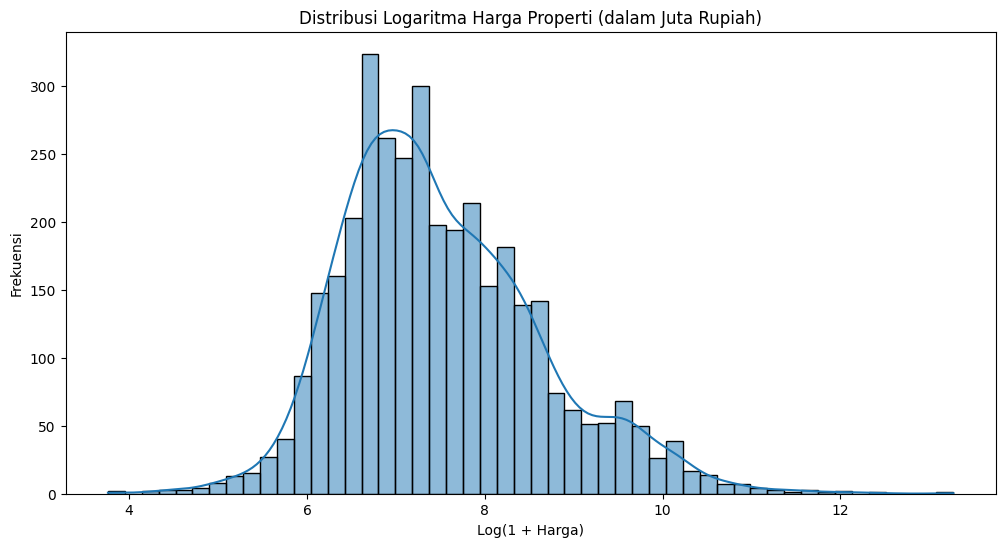

In [26]:
# --- 1. MELIHAT DISTRIBUSI HARGA ---
plt.figure(figsize=(12, 6))
# Kita gunakan log-transform pada harga agar distribusinya lebih terlihat normal
# Ini membantu mengatasi kemiringan (skewness) karena adanya beberapa rumah yang sangat mahal
sns.histplot(np.log1p(df['price']), kde=True, bins=50)
plt.title('Distribusi Logaritma Harga Properti (dalam Juta Rupiah)')
plt.xlabel('Log(1 + Harga)')
plt.ylabel('Frekuensi')
plt.show()

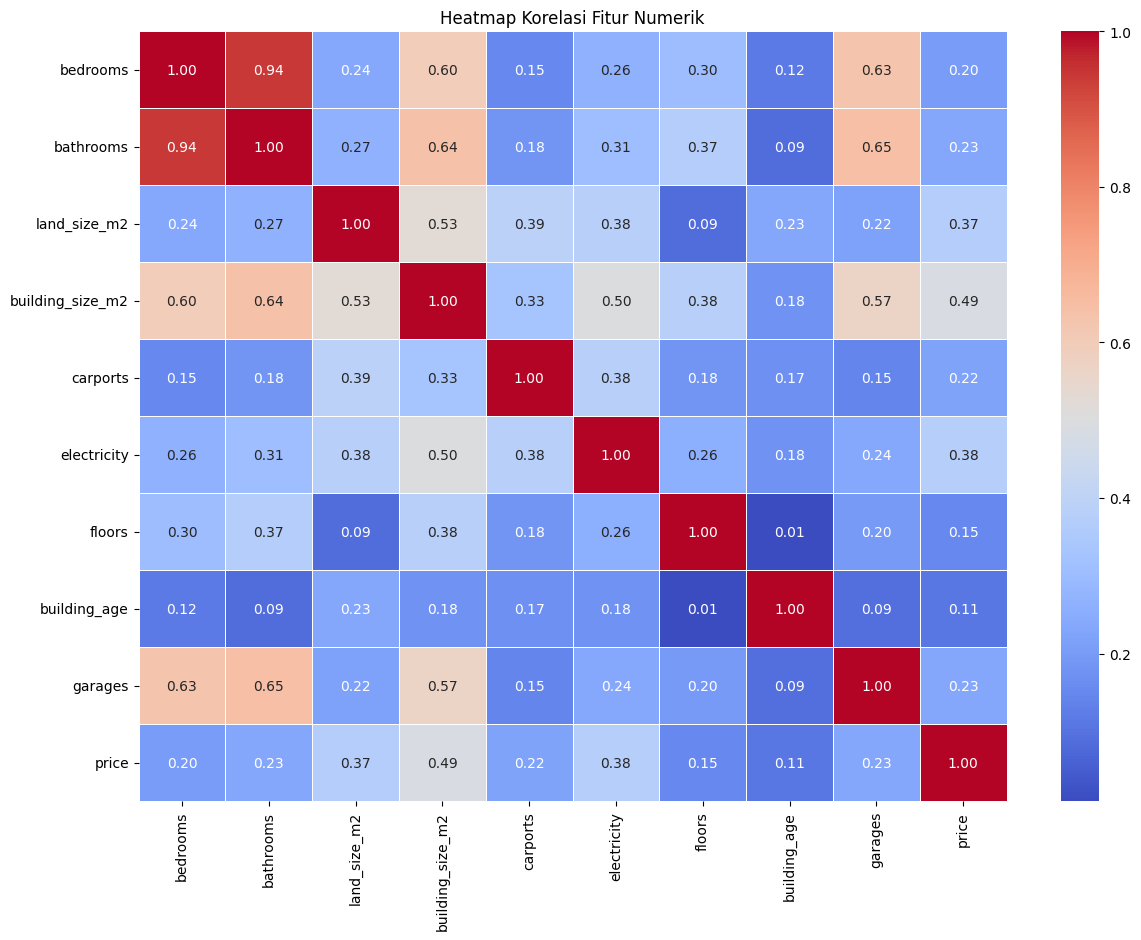

In [27]:
# --- 2. MELIHAT KORELASI ANTAR FITUR NUMERIK ---
# Kita hanya pilih kolom numerik untuk heatmap korelasi
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

In [28]:
# Remove outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

print(f"Shape of data before outlier removal: {df.shape}")
print(f"Shape of data after outlier removal: {df_cleaned.shape}")

# Update the dataframe to the cleaned version
df = df_cleaned

Shape of data before outlier removal: (3553, 13)
Shape of data after outlier removal: (3168, 13)


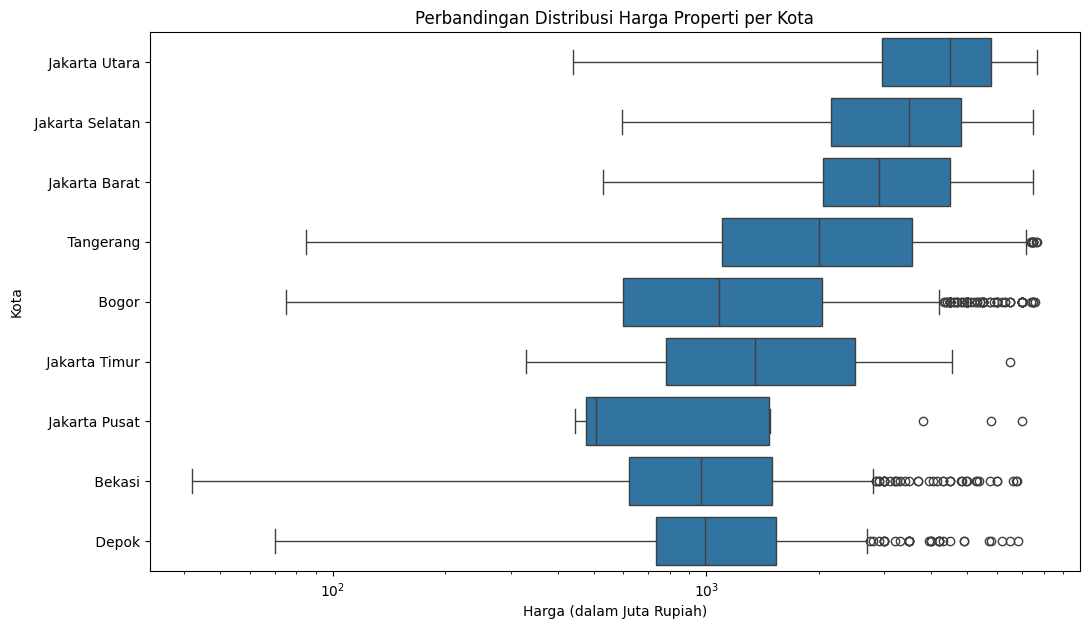

In [29]:
# --- 3. HARGA RATA-RATA BERDASARKAN KOTA ---
plt.figure(figsize=(12, 7))
# Urutkan bar berdasarkan harga rata-rata
city_price_order = df.groupby('city')['price'].mean().sort_values(ascending=False).index

sns.boxplot(data=df, x='price', y='city', order=city_price_order)
plt.title('Perbandingan Distribusi Harga Properti per Kota')
plt.xlabel('Harga (dalam Juta Rupiah)')
plt.ylabel('Kota')
# Gunakan skala log untuk menangani outlier harga yang sangat tinggi
plt.xscale('log')
plt.show()

## Preprocessing


In [30]:
# Separate target variable
X = df.drop('price', axis=1)
y = df['price']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:


# Identify categorical and numerical columns (excluding target)
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')), # One-hot encode categorical features

])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [33]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [34]:
X_train_processed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30408 stored elements and shape (2534, 352)>

## TRAIN MODEL

In [35]:
# Import model-model yang akan kita gunakan
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import metrik untuk evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import MLflow
import mlflow
import mlflow.sklearn


# 1. Tentukan nama eksperimen di MLflow
mlflow.set_tracking_uri("file:../mlruns")
mlflow.set_experiment("Prediksi Harga Properti v2")


# 2. Siapkan daftar model yang akan diuji
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=130, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=130, random_state=42)
}

# 3. Looping untuk melatih, mengevaluasi, dan mencatat setiap model
for model_name, model in models.items():

    # Mulai sesi pencatatan MLflow untuk model ini
    with mlflow.start_run(run_name=model_name):

        # Buat pipeline lengkap: Preprocessing -> Model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Latih pipeline
        print(f"Melatih model {model_name}...")
        pipeline.fit(X_train, y_train)

        # Buat prediksi di data test
        y_pred = pipeline.predict(X_test)

        # Hitung metrik evaluasi
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Tampilkan hasil di notebook
        print(f"--- Hasil untuk {model_name} ---")
        print(f"Mean Absolute Error (MAE): {mae:.2f} (Juta Rupiah)")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f} (Juta Rupiah)")
        print(f"R-squared (R²): {r2:.3f}")
        print("-" * 30)

        # Catat (log) parameter dan metrik ke MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2_score", r2)

        # Catat (log) model (pipeline) yang sudah dilatih
        mlflow.sklearn.log_model(pipeline, "model")

print("Semua model telah selesai dilatih dan dicatat di MLflow!")

2025/08/17 09:30:27 INFO mlflow.tracking.fluent: Experiment with name 'Prediksi Harga Properti v2' does not exist. Creating a new experiment.


Melatih model Linear Regression...
--- Hasil untuk Linear Regression ---
Mean Absolute Error (MAE): 542.81 (Juta Rupiah)
Root Mean Squared Error (RMSE): 1076.35 (Juta Rupiah)
R-squared (R²): 0.598
------------------------------


2025/08/17 09:30:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/17 09:30:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/17 09:30:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Melatih model Ridge...
--- Hasil untuk Ridge ---
Mean Absolute Error (MAE): 538.31 (Juta Rupiah)
Root Mean Squared Error (RMSE): 1042.55 (Juta Rupiah)
R-squared (R²): 0.623
------------------------------


2025/08/17 09:30:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melatih model Random Forest...


2025/08/17 09:31:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


--- Hasil untuk Random Forest ---
Mean Absolute Error (MAE): 357.26 (Juta Rupiah)
Root Mean Squared Error (RMSE): 647.54 (Juta Rupiah)
R-squared (R²): 0.854
------------------------------


2025/08/17 09:31:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Melatih model XGBoost...


2025/08/17 09:31:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


--- Hasil untuk XGBoost ---
Mean Absolute Error (MAE): 333.35 (Juta Rupiah)
Root Mean Squared Error (RMSE): 585.82 (Juta Rupiah)
R-squared (R²): 0.881
------------------------------


2025/08/17 09:31:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Semua model telah selesai dilatih dan dicatat di MLflow!


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor

mlflow.set_tracking_uri("file:../mlruns")
# Siapkan model XGBoost dengan beberapa parameter dasar
model_to_tune_xgb = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42,
    n_jobs=-1 # Gunakan semua core CPU
)

# Buat pipeline baru khusus untuk tuning XGBoost
tuning_pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model_to_tune_xgb)
])

# 1. Tentukan rentang hyperparameter yang ingin diuji untuk XGBoost
param_dist_xgb = {
    'regressor__n_estimators': randint(100, 700),       # Jumlah pohon
    'regressor__max_depth': randint(3, 10),             # Kedalaman maksimum pohon
    'regressor__learning_rate': uniform(0.01, 0.5),     # Laju pembelajaran
    'regressor__subsample': uniform(0.7, 0.3),          # Persentase baris data yang digunakan per pohon
    'regressor__colsample_bytree': uniform(0.7, 0.3),   # Persentase fitur yang digunakan per pohon
    'regressor__gamma': uniform(0, 0.5),                # Parameter untuk mengontrol kompleksitas
    'regressor__reg_alpha': uniform(0, 1)               # L1 Regularization
}

# 2. Setup RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=tuning_pipeline_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='r2'
)

print("Memulai Hyperparameter Tuning untuk XGBoost...")
# 3. Jalankan proses tuning
random_search_xgb.fit(X_train, y_train)

# 4. Tampilkan hasil terbaik
print("\n--- Hasil Tuning XGBoost Selesai ---")
print(f"Parameter terbaik ditemukan: {random_search_xgb.best_params_}")
print(f"Skor R² Cross-Validation terbaik: {random_search_xgb.best_score_:.3f}")

# 5. Dapatkan model terbaik dan evaluasi di data test
best_tuned_model_xgb = random_search_xgb.best_estimator_
y_pred_tuned_xgb = best_tuned_model_xgb.predict(X_test)

mae_tuned_xgb = mean_absolute_error(y_test, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(mean_squared_error(y_test, y_pred_tuned_xgb))
r2_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)

print("\n--- Performa Model XGBoost Hasil Tuning di Data Test ---")
print(f"Mean Absolute Error (MAE): {mae_tuned_xgb:.2f} (Juta Rupiah)")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_xgb:.2f} (Juta Rupiah)")
print(f"R-squared (R²): {r2_tuned_xgb:.3f}")

# Log hasil tuning XGBoost ke MLflow
with mlflow.start_run(run_name="Tuned XGBoost"):
    print("\nMencatat hasil tuning XGBoost ke MLflow...")
    mlflow.log_params(random_search_xgb.best_params_)
    mlflow.log_metric("test_mae", mae_tuned_xgb)
    mlflow.log_metric("test_rmse", rmse_tuned_xgb)
    mlflow.log_metric("test_r2_score", r2_tuned_xgb)
    mlflow.sklearn.log_model(best_tuned_model_xgb, "tuned_xgb_model")

print("\nModel XGBoost hasil tuning berhasil dicatat di MLflow!")

Memulai Hyperparameter Tuning untuk XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END regressor__colsample_bytree=0.8123620356542087, regressor__gamma=0.4753571532049581, regressor__learning_rate=0.37599697090570255, regressor__max_depth=7, regressor__n_estimators=120, regressor__reg_alpha=0.15601864044243652, regressor__subsample=0.7467983561008608; total time=   0.3s
[CV] END regressor__colsample_bytree=0.8123620356542087, regressor__gamma=0.4753571532049581, regressor__learning_rate=0.37599697090570255, regressor__max_depth=7, regressor__n_estimators=120, regressor__reg_alpha=0.15601864044243652, regressor__subsample=0.7467983561008608; total time=   0.2s
[CV] END regressor__colsample_bytree=0.8123620356542087, regressor__gamma=0.4753571532049581, regressor__learning_rate=0.37599697090570255, regressor__max_depth=7, regressor__n_estimators=120, regressor__reg_alpha=0.15601864044243652, regressor__subsample=0.7467983561008608; total time=   0.2s
[CV] E

2025/08/17 09:35:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/17 09:35:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Model XGBoost hasil tuning berhasil dicatat di MLflow!


In [37]:
import mlflow

# Pastikan tracking URI sudah benar
mlflow.set_tracking_uri("file:../mlruns")

# model XGBoost 
run_id = "33db2af376014b06a597606926a83aec" 
model_name = "Propify-Price-Predictor"
model_uri = f"runs:/{run_id}/model"

# Daftarkan model ke MLflow Model Registry
registered_model = mlflow.register_model(
    model_uri=model_uri,
    name=model_name
)

print(f"Model '{model_name}' berhasil didaftarkan.")
print(f"Versi baru: {registered_model.version}")

Successfully registered model 'Propify-Price-Predictor'.


MlflowException: Run '33db2af376014b06a597606926a83aec' not found

In [ ]:
import joblib

# 'best_tuned_model_xgb' adalah variabel yang berisi model terbaik dari langkah tuning Anda
# Pastikan variabel ini ada atau muat ulang model terbaik Anda jika perlu.
file_model = 'model.joblib'
joblib.dump(best_tuned_model_xgb, file_model)

print(f"Model telah disimpan ke file: {file_model}")

Model telah disimpan ke file: model.joblib
